In [17]:
import numpy as np


# DATA ASSIMILATION PROCESS

In [7]:
observations = np.array([15.2,16.1,14.5,15.8,25.0])
model_data = np.array([14.8,15.5,14.0,16.0,25.3])

In [9]:

# Initial estimates
initial_state_estimate = model_data[0]
initial_covariance_estimate = 1

# Process and measurement noise
process_noise = 1
measurement_noise = 1

# Number of measurements
num_measurements = len(observations)

# Arrays to store the results
filtered_state_estimates = np.zeros(num_measurements)
filtered_covariance_estimates = np.zeros(num_measurements)

# Initial values
filtered_state_estimates[0] = initial_state_estimate
filtered_covariance_estimates[0] = initial_covariance_estimate

for k in range(1, num_measurements):
    # Prediction step
    predicted_state_estimate = filtered_state_estimates[k-1]
    predicted_covariance_estimate = filtered_covariance_estimates[k-1] + process_noise

    # Update step
    kalman_gain = predicted_covariance_estimate / (predicted_covariance_estimate + measurement_noise)
    filtered_state_estimates[k] = predicted_state_estimate + kalman_gain * (observations[k] - predicted_state_estimate)
    filtered_covariance_estimates[k] = (1 - kalman_gain) * predicted_covariance_estimate
    

# Print the results
print("Observations: ", observations)
print("Model data", model_data)
print("Filtered state estimates:", filtered_state_estimates)


Observations:  [15.2 16.1 14.5 15.8 25. ]
Model data [14.8 15.5 14.  16.  25.3]
Filtered state estimates: [14.8        15.66666667 14.9375     15.47142857 21.36181818]


# ANALYSIS AND COMPARISONS

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [19]:
data = {
    "Model Data": model_data,
    "Observations": observations,
    "Assimilated Data": filtered_state_estimates
}
df = pd.DataFrame(data)
df

,Model Data,Observations,Assimilated Data
0,14.8,15.2,14.800000
1,15.5,16.1,15.666667
2,14.0,14.5,14.937500
3,16.0,15.8,15.471429
4,25.3,25.0,21.361818


In [30]:
RMSE_o = mean_squared_error(df['Observations'], df['Assimilated Data'],squared=False)
MBE_o = np.mean(df['Assimilated Data'] - df['Observations'])

RMSE_m = mean_squared_error(df['Model Data'], df['Assimilated Data'],squared=False)
MBE_m = np.mean(df['Assimilated Data'] - df['Model Data'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_12108\3607870864.py:21: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df1.pivot("Observed", "Assimilated", values="Values"),annot=True,annot_kws={'fontsize':15}, ax=ax1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12108\3607870864.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(df2.pivot("Modelled", "Assimilated", values="Values"),annot=True,annot_kws={'fontsize':15}, ax=ax2)


Text(906.8986928104574, 0.5, 'Model')

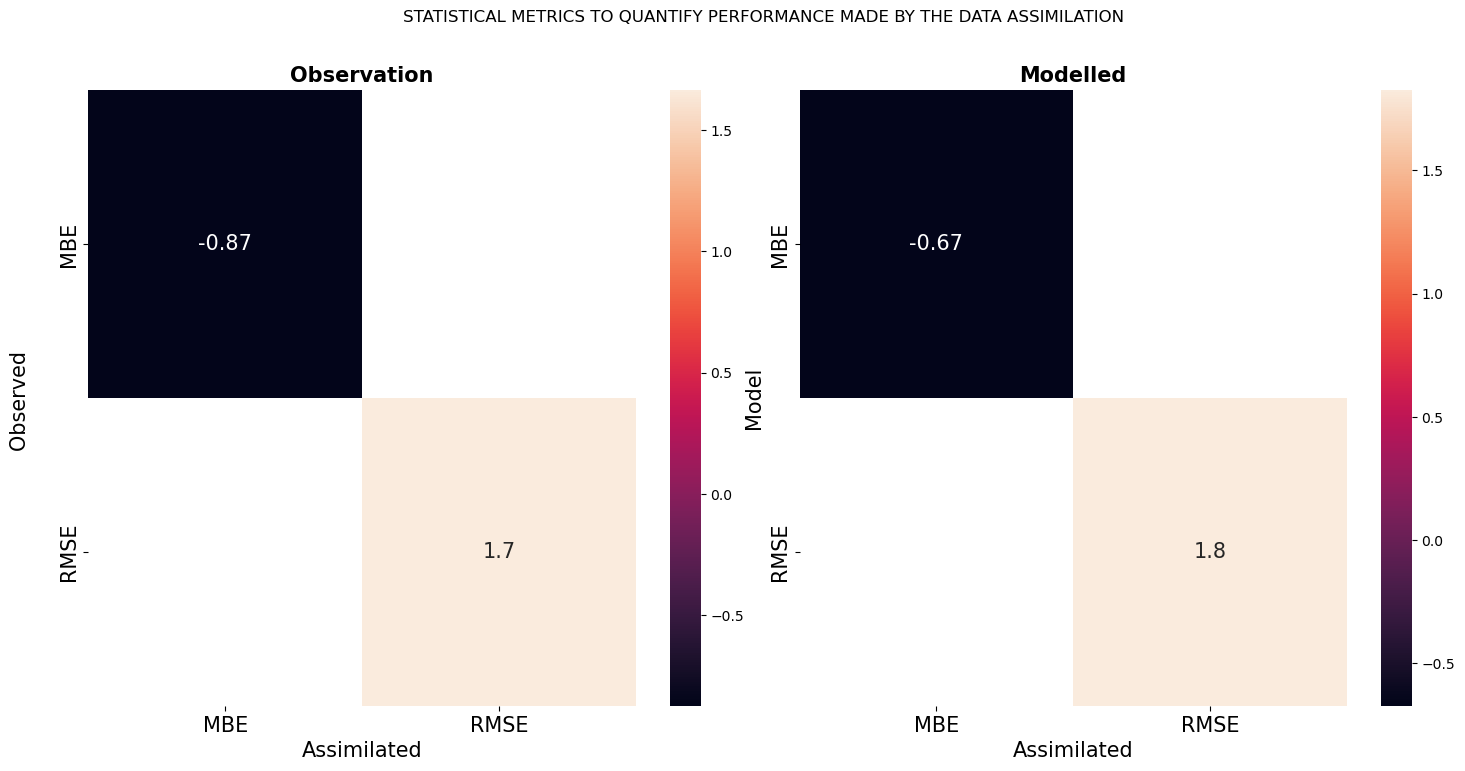

In [49]:
Observations_data = {
    "Observed":["RMSE", "MBE"],
    "Assimilated": ["RMSE", "MBE"],
    "Values": [RMSE_o, MBE_o]
}

Modelled_data = {
    "Modelled":["RMSE", "MBE"],
    "Assimilated": ["RMSE", "MBE"],
    "Values": [RMSE_m, MBE_m]
}


df1 = pd.DataFrame(Observations_data)
df2 = pd.DataFrame(Modelled_data)


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,8))
fig.subplots_adjust(wspace=0.04)

sns.heatmap(df1.pivot("Observed", "Assimilated", values="Values"),annot=True,annot_kws={'fontsize':15}, ax=ax1)
sns.heatmap(df2.pivot("Modelled", "Assimilated", values="Values"),annot=True,annot_kws={'fontsize':15}, ax=ax2)


fig.suptitle("STATISTICAL METRICS TO QUANTIFY PERFORMANCE MADE BY THE DATA ASSIMILATION")

ax1.set_title("Observation", fontweight ="bold", fontsize=15)
ax1.tick_params(axis='both',labelsize=15)
ax1.set_xlabel('Assimilated', fontsize=15)
ax1.set_ylabel('Observed \n', fontsize=15)

ax2.set_title("Modelled", fontweight ="bold", fontsize=15)
ax2.tick_params(axis='both',labelsize=15)
ax2.set_xlabel('Assimilated', fontsize=15)
ax2.set_ylabel('Model', fontsize=15)